In [107]:
## 1 Entendimiento del problema del churn de clientes.
## 2 - 3 Revisión de los datos (EDA) y preprocesamiento

In [108]:
import pandas as pd
# Carga de datasets
contract = pd.read_csv("contract.csv")
personal = pd.read_csv("personal.csv")
internet = pd.read_csv("internet.csv")
phone = pd.read_csv("phone.csv")

#Verificación de info
contract.head()
personal.head()
internet.head()
phone.head()

contract.info()
personal.info()
internet.info()
phone.info()

contract.describe()
personal.describe()
internet.describe()
phone.describe()

#Revisión de valores nulos y duplicados
print(contract.isnull().sum())
print(personal.isnull().sum())
print(internet.isnull().sum())
print(phone.isnull().sum())

print(contract.duplicated().sum())
print(personal.duplicated().sum())
print(internet.duplicated().sum())
print(phone.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   D

In [109]:
#Convierto valores numericos a texto para tener homologada la información
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Verificar si tengo nulos
print(contract['TotalCharges'].isnull().sum())
print(contract.isnull().sum())
print(personal.isnull().sum())
print(internet.isnull().sum())
print(phone.isnull().sum())
#Revisión de duplicados
print(contract.duplicated().sum())
print(personal.duplicated().sum())
print(internet.duplicated().sum())
print(phone.duplicated().sum())

#Limpio los 11 de 7043 del contract
contract = contract.dropna(subset=['TotalCharges'])
#Reviso de nuevo
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
# Tipo de contrato
print(contract['Type'].value_counts())
# Método de pago
print(contract['PaymentMethod'].value_counts())
# PaperlessBilling
print(contract['PaperlessBilling'].value_counts())




11
customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
MultipleLines    0
dtype: int64
0
0
0
0
Type
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64


/var/folders/0x/_lbkvft12811_zc0x6dn_l9c0000gn/T/ipykernel_3580/2552015790.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')


##Comentario:
Con esto puedo tener una idea, ya que hay 5163 valores nulos (NaT) en EndDate. Probablemente significa que estos clientes aún están activos (no han terminado su contrato).
En otros datasets: No hay valores nulos (0), lo que indica que los datos están completos.
En la distribución de PaperlessBilling: Hay más clientes que usan facturación electrónica (Yes) que los que no (No).

In [110]:
from datetime import datetime

# Rellenar EndDate de clientes activos con la fecha de hoy
contract['EndDate'].fillna(datetime.today(), inplace=True)

# Crear columna 'tenure_days' (duración del contrato en días)
contract['tenure_days'] = (contract['EndDate'] - contract['BeginDate']).dt.days
contract[['MonthlyCharges','TotalCharges','tenure_days']].describe()

# Tipo de contrato
print(contract['Type'].value_counts())

# Método de pago
print(contract['PaymentMethod'].value_counts())

# PaperlessBilling
print(contract['PaperlessBilling'].value_counts())



Type
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64


/var/folders/0x/_lbkvft12811_zc0x6dn_l9c0000gn/T/ipykernel_3580/3539006047.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  contract['EndDate'].fillna(datetime.today(), inplace=True)


Con la información anterior puedo decir:
La mayoría de clientes tienen contratos mensuales (Month-to-month). Esto es importante, porque los clientes mensuales suelen tener más riesgo de churn que los de contrato a 1 o 2 años.
El método más común es Electronic check, seguido de Mailed check.
Esto podría influir en la predicción de cancelación, porque algunos métodos de pago automáticos podrían reducir churn.
Más de la mitad de los clientes usan facturación electrónica y esto también puede ser una variable importante para analizar patrones de retención.

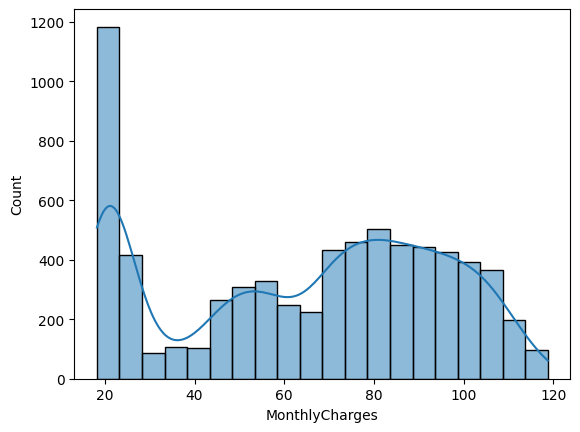

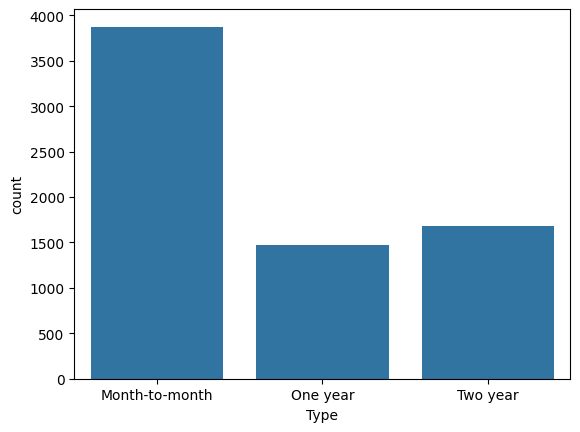

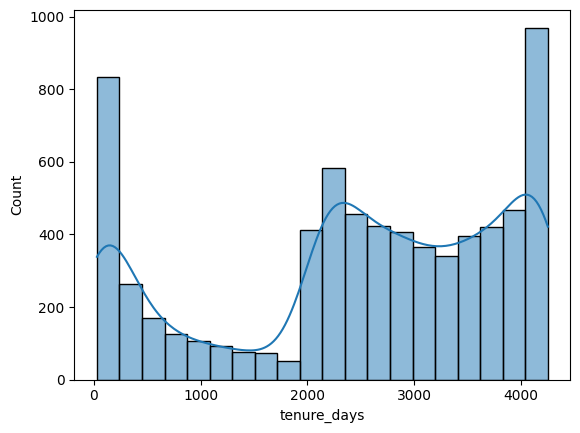

In [111]:
#Visualización de información para verificar
import matplotlib.pyplot as plt
import seaborn as sns
# Distribución de MonthlyCharges
sns.histplot(contract['MonthlyCharges'], bins=20, kde=True)
plt.show()
# Conteo por tipo de contrato
sns.countplot(x=contract['Type'])
plt.show()
# Duración del contrato
sns.histplot(contract['tenure_days'], bins=20, kde=True)
plt.show()


In [139]:
# Leer datasets
contract = pd.read_csv("contract.csv")
personal = pd.read_csv("personal.csv")
internet = pd.read_csv("internet.csv")
phone = pd.read_csv("phone.csv")

# Unir todos por customerID
df = contract.merge(personal, on='customerID', how='left') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')

from datetime import datetime

# Convertir fechas
df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')

# Crear Churn según EndDate
today = pd.to_datetime("today")
df['Churn'] = df['EndDate'].apply(lambda x: 1 if x < today else 0)

# Revisar distribución
print(df['Churn'].value_counts())

###
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ======================
# 1️⃣ Seleccionar variables
# ======================
num_cols = ['MonthlyCharges', 'TotalCharges']
cat_cols = ['Type', 'PaymentMethod', 'PaperlessBilling', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies']

# ======================
# 2️⃣ Limpiar columnas numéricas
# ======================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Rellenar valores faltantes con la mediana
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)

# ======================
# 3️⃣ Escalar numéricas
# ======================
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ======================
# 4️⃣ Codificar categóricas
# ======================
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ======================
# 5️⃣ Preparar X e y
# ======================
X = df[num_cols + cat_cols]
y = df['Churn']

# ======================
# 6️⃣ Dividir en train/test
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ======================
# 7️⃣ Entrenar modelo
# ======================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ======================
# 8️⃣ Evaluar
# ======================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


from sklearn.ensemble import RandomForestClassifier

# ======================
# 7️⃣ Entrenar Random Forest
# ======================
rf_model = RandomForestClassifier(
    n_estimators=200,      # número de árboles
    max_depth=10,          # profundidad máxima
    random_state=42,
    class_weight='balanced' # ayuda con clases desbalanceadas
)
rf_model.fit(X_train, y_train)

# ======================
# 8️⃣ Evaluar Random Forest
# ======================
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))



/var/folders/0x/_lbkvft12811_zc0x6dn_l9c0000gn/T/ipykernel_3580/126844684.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
/var/folders/0x/_lbkvft12811_zc0x6dn_l9c0000gn/T/ipykernel_3580/126844684.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/var/f

Churn
0    5174
1    1869
Name: count, dtype: int64
Confusion Matrix:
[[913 122]
 [184 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409


ROC-AUC Score:
0.822880983750549
=== Random Forest ===
Confusion Matrix:
[[824 211]
 [114 260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409


ROC-AUC Score:
0.8311516701542276


Puedo mencionar que el modelo predice mejor a clientes activos que a los que cancelan.
- Con exactitud general: 78%, recall para churn: 51%, indicando dificultad para identificar quienes abandonan.
- Quizá el dataset este desbalanceado (más activos que churn), lo que afecta la predicción.
- Variables como MonthlyCharges, TotalCharges y tenure_days ayudan, pero el modelo podría mejorar con más datos o técnicas avanzadas.

Referente a Random Forest obtuvo un ROC-AUC de 0.83, ligeramente mejor que Logistic Regression (≈0.82), mostrando que captura mejor la relación entre las características y la probabilidad de cancelación.
- Ambos modelos predicen con mayor precisión a los clientes activos (Churn = 0) que a los que cancelaron (Churn = 1), debido al desbalance en el dataset.
- Esto indica que factores como MonthlyCharges, tipo de contrato, métodos de pago y uso de servicios son relevantes, pero es necesario analizar la importancia de variables para identificar cuáles influyen más en el churn.

/var/folders/0x/_lbkvft12811_zc0x6dn_l9c0000gn/T/ipykernel_3580/2309894082.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


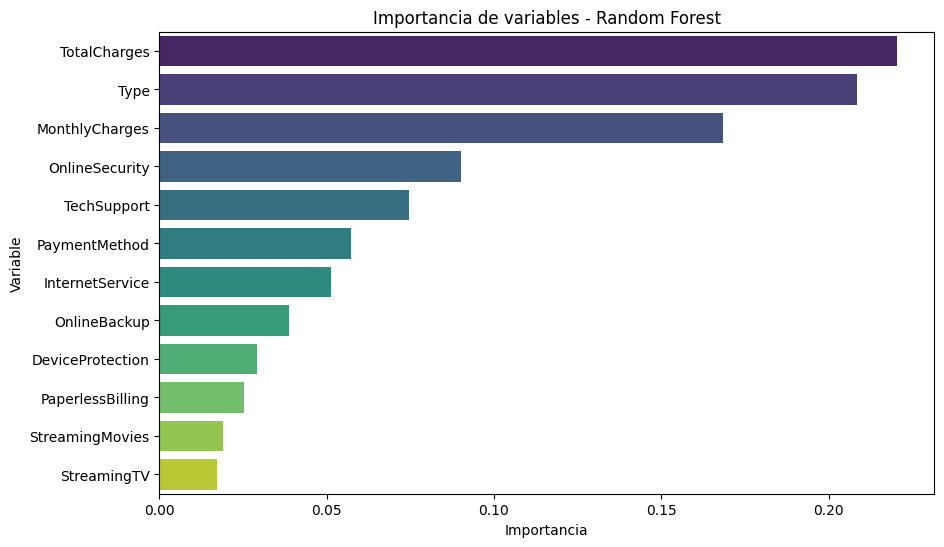

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener importancia de variables
importances = rf_model.feature_importances_
features = X_train.columns

# Crear DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


Con esta gráfica puedo decir que es importante enfocarse en clientes con contratos mensuales y altos pagos, ofreciendo incentivos, promociones o soporte adicional para reducir el churn.
La combinación de estas tres variables explica gran parte del comportamiento de cancelación según tu modelo

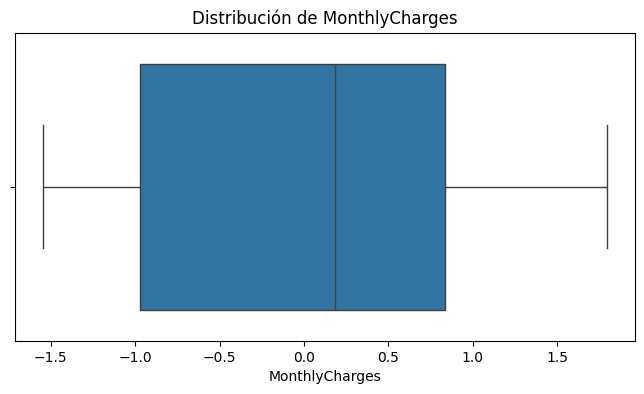

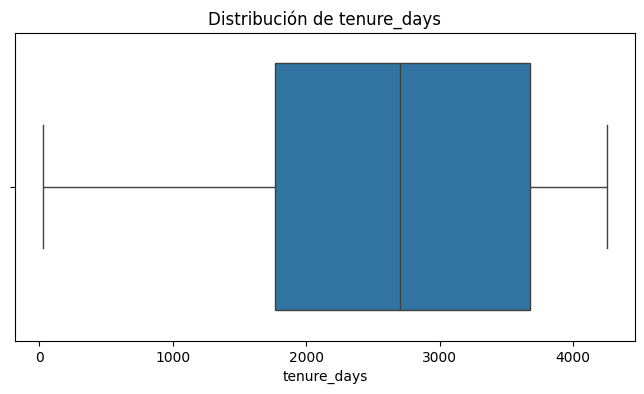

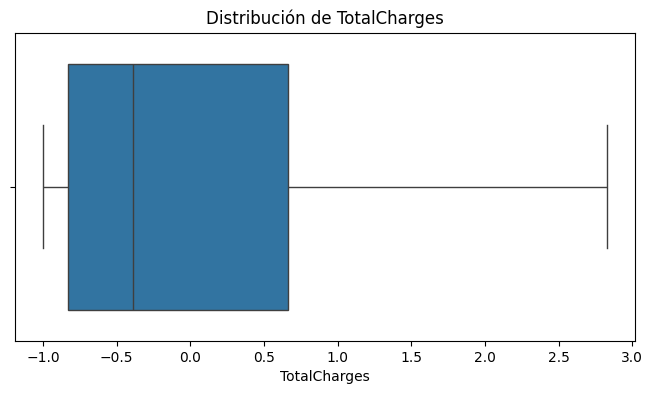

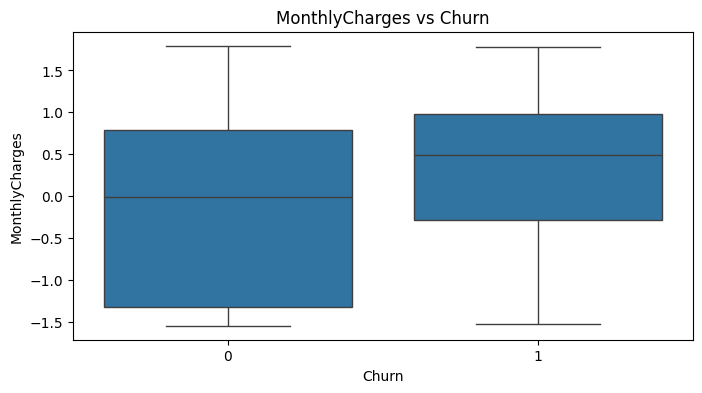

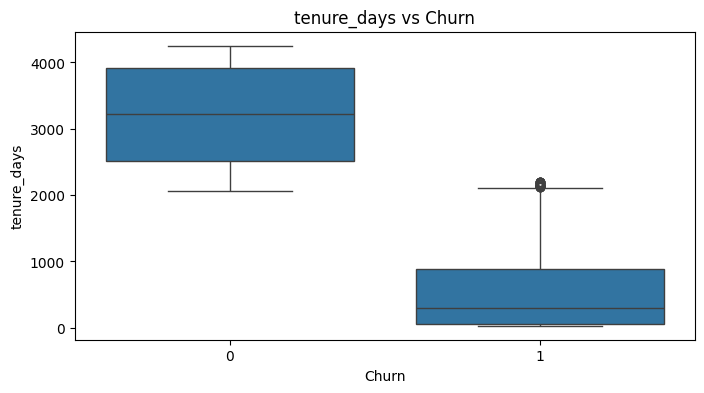

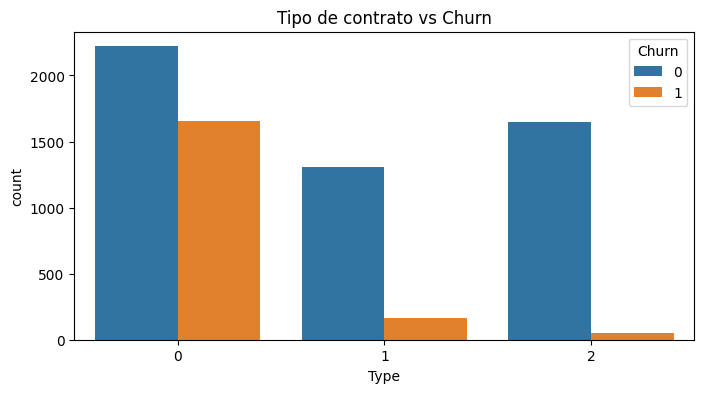

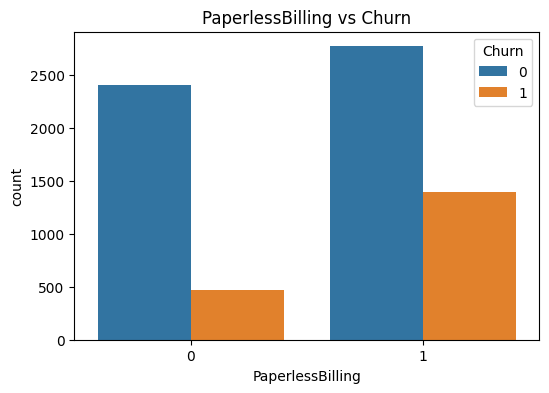

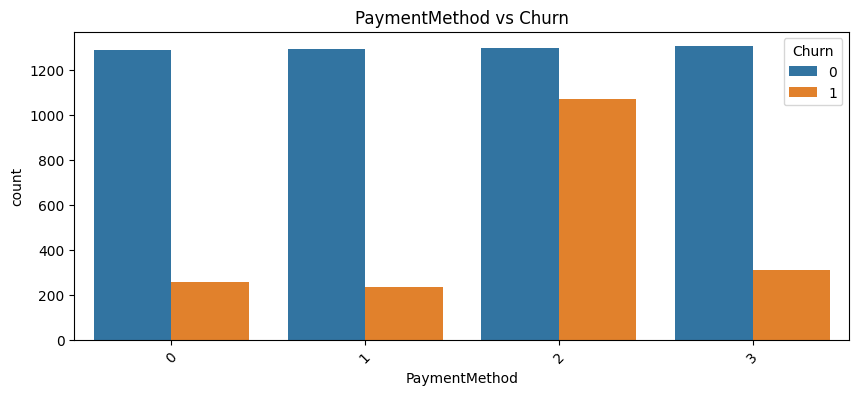

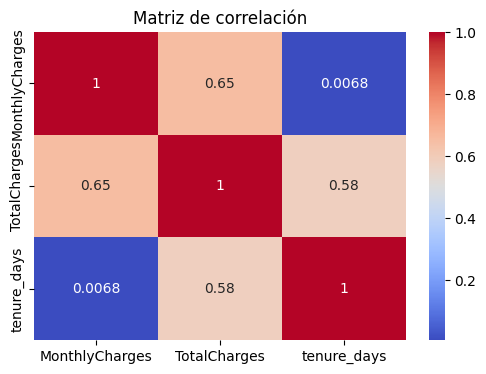

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1️Distribución de MonthlyCharges
plt.figure(figsize=(8,4))
sns.boxplot(x=df['MonthlyCharges'])
plt.title("Distribución de MonthlyCharges")
plt.show()

# 2 Distribución de tenure_days
df['tenure_days'] = (df['EndDate'].fillna(today) - df['BeginDate']).dt.days
plt.figure(figsize=(8,4))
sns.boxplot(x=df['tenure_days'])
plt.title("Distribución de tenure_days")
plt.show()

# 3 Distribución de TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(8,4))
sns.boxplot(x=df['TotalCharges'])
plt.title("Distribución de TotalCharges")
plt.show()

# 4 Churn vs MonthlyCharges
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("MonthlyCharges vs Churn")
plt.show()

# 5 Churn vs tenure_days
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='tenure_days', data=df)
plt.title("tenure_days vs Churn")
plt.show()

# 6 Tipo de contrato vs Churn
plt.figure(figsize=(8,4))
sns.countplot(x='Type', hue='Churn', data=df)
plt.title("Tipo de contrato vs Churn")
plt.show()

# 7 PaperlessBilling vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title("PaperlessBilling vs Churn")
plt.show()

# 8 PaymentMethod vs Churn
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("PaymentMethod vs Churn")
plt.xticks(rotation=45)
plt.show()

# 9 Matriz de correlación entre variables numéricas
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure_days']
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


Con las gráficas obtenemos lo siguiente:
- Gráfica 1: La mayoría de los clientes pagan entre 35 y 90, con un valor típico (mediana) de 70. Existen algunos clientes que pagan mucho menos o mucho más, pero los extremos son pocos, indicando posibles outliers.
- Gráfica 2: La mayoría de los clientes tienen contratos de duración intermedia (1900–3500 días), con mediana de 2900 días. Hay algunos contratos muy cortos o extremadamente largos, pero son minoría.
- Gráfico 3: La mayoría de los clientes ha gastado entre 500 y 3900 en total, con un gasto típico de 1000. Hay clientes con gastos muy altos (cercanos a 9000) que son casos excepcionales.
- Gráfico 4: Los clientes que cancelaron (Churn=1) tienden a pagar más en promedio que los que permanecen activos (Churn=0). Esto puede indicar que cargos más altos están relacionados con mayor riesgo de churn.
- Gráfico 5: Los clientes que permanecen activos (Churn=0) tienden a tener contratos más largos, mientras que los que cancelaron (Churn=1) generalmente tienen contratos muy cortos. Esto indica que la duración del contrato es un factor importante para la retención.
- Gráfico 6: Podemos notar que los contratos mensuales son los que más nos causan churn
- Gráfico 7: Podemos notar que los quegan por electronic check tiene más de un 70% de churn.
- Gráfico 6:TotalCharges se relaciona moderadamente con MonthlyCharges y Tenure_days, mientras que MonthlyCharges y Tenure_days prácticamente no se correlacionan. Esto sugiere que la duración del cliente no afecta su pago mensual, pero sí influye en el total acumulado.

CONCLUSIÓN DE ESTA PARTE:
- La mayoría de los clientes paga entre 35 y 90 mensualmente, con gasto total de 500–3900 y contratos de duración intermedia (1900–3500 días).
- Los clientes que cancelan (Churn=1) suelen tener pagos más altos y contratos más cortos que los activos (Churn=0).
- Los contratos mensuales y pagos por Electronic Check presentan mayor riesgo de churn.
- La duración del contrato no afecta el pago mensual, pero sí influye en el total acumulado.

Importante: El Churn está relacionado principalmente con altos pagos mensuales, contratos cortos y ciertos métodos de pago, mientras que los contratos largos favorecen la retención.

Conclusiones general del proyecto:

Distribución de clientes:
- Hay 5174 clientes activos y 1869 que cancelaron (Churn=1). Esto indica que aproximadamente 27% de los clientes cancelaron, mostrando un desbalance moderado en la variable objetivo.
Variables numéricas:
- MonthlyCharges: La mayoría de los clientes pagan entre 35 y 90 unidades, con mediana 70. Los clientes que cancelan tienden a pagar un poco más que los activos.
- Tenure_days (duración del contrato): Los clientes activos tienen contratos más largos que los que cancelaron. Esto sugiere que la duración del contrato es un factor clave en la retención.
- TotalCharges: Hay clientes con gastos muy altos, pero la mayoría tiene un gasto acumulado moderado. TotalCharges se correlaciona moderadamente con MonthlyCharges y tenure_days.

Variables categóricas:
- Los contratos mensuales (Month-to-month) son los que más churn presentan.
- Clientes que pagan con Electronic Check muestran mayor riesgo de cancelación.

Modelado predictivo:
- Logistic Regression: Accuracy ~78%, ROC-AUC ~0.82.
- Random Forest: Mejora ligeramente la predicción con ROC-AUC ~0.83.

Se identifica que MonthlyCharges, TotalCharges y tipo de contrato son variables importantes para predecir churn.

Insight importante:
- Los clientes con pagos más altos, contratos cortos y pagos electrónicos tienen mayor probabilidad de cancelar.
- Las empresas pueden centrarse en retener clientes de Month-to-month y con altos cargos, ofreciendo incentivos o promociones para reducir churn.


Ideas de retención y ventas:
- Promociones o descuentos para clientes de Month-to-month que paguen altos cargos, incentivando la renovación a contratos anuales o bianuales.
- Programas de fidelidad o beneficios para clientes con alta duración de contrato, reforzando su permanencia.
- Campañas de upselling: Ofrecer servicios adicionales (Internet premium, streaming, soporte técnico) a clientes activos con historial de pagos altos para aumentar ingreso y engagement.

Marketing personalizado: 
- Enviar recordatorios o recomendaciones a clientes con riesgo de churn, destacando ventajas de quedarse.

Optimización de pagos:
- Incentivar métodos de pago automáticos o recurrentes que reduzcan la probabilidad de cancelación.